In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [ ]:

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('output',axis=1)
y = data['output']

In [ ]:
from sklearn import preprocessing
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trtbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalachh,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exng,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X_df,y,test_size = 0.3 , random_state = 0 )


In [ ]:
from keras import callbacks
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 103ms/step - loss: 0.6930 - accuracy: 0.5858 - val_loss: 0.6933 - val_accuracy: 0.4419
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.5858 - val_loss: 0.6936 - val_accuracy: 0.4419
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6924 - accuracy: 0.5858 - val_loss: 0.6938 - val_accuracy: 0.4419
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.6921 - accuracy: 0.5858 - val_loss: 0.6941 - val_accuracy: 0.4419
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6917 - accuracy: 0.5858 - val_loss: 0.6944 - val_accuracy: 0.4419
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.6913 - accuracy: 0.5858 - val_loss: 0.6946 - val_accuracy: 0.4419
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6908 - accuracy: 0.5858 - val_loss: 0.6949 - val_accuracy: 0.4419
Epoch 8/100
6/6 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

predictions=modelLR.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[32 12]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



<Axes: ylabel='Feature'>

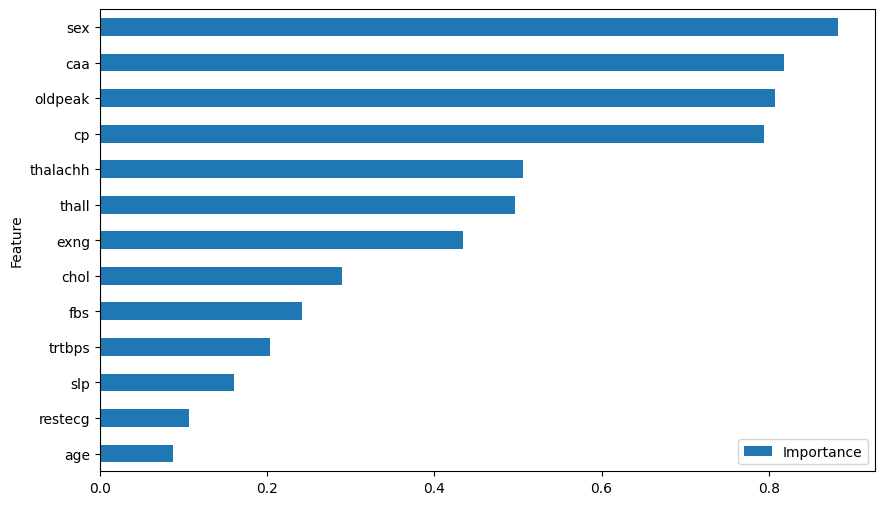

In [ ]:
coefficients = modelLR.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
# Create an instance of Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training / Fitting the model
rf_model.fit(X_train, y_train)

# Prediction
rf_predictions = rf_model.predict(X_test)
rf_predictions2 = rf_model.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

[[33 11]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        44
           1       0.80      0.94      0.86        47

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train,y_train)

svm_predictions = svm_model.predict(X_test)
svm_predictions2 = svm_model.predict(X_train)

print(confusion_matrix(y_test,svm_predictions))
print(classification_report(y_test,svm_predictions))

[[31 13]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        44
           1       0.76      0.89      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def get_models():
 models = list()
 models.append(('lr', LogisticRegression()))
 models.append(('svm',SVC(kernel='linear', C=1.0,probability=True)))
 models.append(('rf',RandomForestClassifier(n_estimators=100, random_state=42)))
 return models

def get_models2():
 models = list()
 models.append(('bayes', GaussianNB()))
 models.append(('cart', DecisionTreeClassifier()))
 models.append(('knn',KNeighborsClassifier(n_neighbors=1)))
 return models

In [ ]:
def evaluate_models(models, X_train, X_val, y_train, y_val):
 # fit and evaluate the models
 scores = list()
 for name, model in models:
 # fit the model
  model.fit(X_train, y_train)
 # evaluate the model
  yhat = model.predict(X_val)
  acc = accuracy_score(y_val, yhat)
 # store the performance
  scores.append(acc)
 # report model performance
 return scores

In [ ]:
models = get_models()
models2 = get_models2()
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
scores2 = evaluate_models(models2, X_train, X_test, y_train, y_test)
print(scores)
print(scores2)
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
ensemble2 = VotingClassifier(estimators=models2, voting='soft', weights=scores2)

ensemble.fit(X_train, y_train)
ensemble2.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
yhat2 = ensemble2.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
score2 = accuracy_score(y_test, yhat2)
print('Weighted Avg Accuracy: %.3f' % (score*100))
print('Weighted Avg Accuracy: %.3f' % (score2*100))

print(classification_report(y_test,yhat))
print(classification_report(y_test,yhat2))

[0.8131868131868132, 0.8021978021978022, 0.8461538461538461]
[0.8021978021978022, 0.7252747252747253, 0.8021978021978022]
Weighted Avg Accuracy: 82.418
Weighted Avg Accuracy: 76.923
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        44
           1       0.77      0.94      0.85        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        44
           1       0.76      0.81      0.78        47

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

